<img src="https://drive.google.com/uc?export=view&id=1wYSMgJtARFdvTt5g7E20mE4NmwUFUuog" width="200">

[![Build Fast with AI](https://img.shields.io/badge/BuildFastWithAI-GenAI%20Bootcamp-blue?style=for-the-badge&logo=artificial-intelligence)](https://www.buildfastwithai.com/genai-course)
[![EduChain GitHub](https://img.shields.io/github/stars/satvik314/educhain?style=for-the-badge&logo=github&color=gold)](https://github.com/satvik314/educhain)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1PGfVZrb4nChFAWhOtHEdTR_SnQSU6qdE#scrollTo=9DAwNllYC_Sr)
## Master Generative AI in 6 Weeks
**What You'll Learn:**
- Build with Latest LLMs
- Create Custom AI Apps
- Learn from Industry Experts
- Join Innovation Community
Transform your AI ideas into reality through hands-on projects and expert mentorship.
[Start Your Journey](https://www.buildfastwithai.com/genai-course)
*Empowering the Next Generation of AI Innovators

## 🛠️✨ **ChromaDB** : Efficient Vector Database for Embeddings
ChromaDB is a powerful vector database designed to handle embedding-based data storage and retrieval. It enables efficient similarity search and content-based querying for multimodal data, including text, images, and more.  

ChromaDB is commonly used in applications like:  
- **Visual Search**: Finding similar images or multimedia content.  
- **Recommendation Systems**: Suggesting related content or products.  
- **Machine Learning Pipelines**: Storing embeddings for clustering, classification, or semantic analysis.  


###Setup and Installation

Install Required Libraries


In [ ]:
!pip install datasets chromadb open-clip-torch

### 📥 Load and Visualize Dataset Images 🖼️

In [ ]:
from datasets import load_dataset
from matplotlib import pyplot as plt
import os

# Load dataset with the 'default' configuration
dataset = load_dataset(path="detection-datasets/coco", split="train", streaming=True)

IMAGE_FOLDER = "images"
N_IMAGES = 20

# For plotting
plot_cols = 5
plot_rows = N_IMAGES // plot_cols
fig, axes = plt.subplots(plot_rows, plot_cols, figsize=(plot_rows*2, plot_cols*2))
axes = axes.flatten()

# Write the images to a folder
dataset_iter = iter(dataset)
os.makedirs(IMAGE_FOLDER, exist_ok=True)
for i in range(N_IMAGES):
    image = next(dataset_iter)['image']
    axes[i].imshow(image)
    axes[i].axis("off")

    image.save(f"{IMAGE_FOLDER}/{i}.jpg")

plt.tight_layout()
plt.show()


### 💻 Initialize ChromaDB Client and Embedding Functions

In [3]:
import chromadb
client = chromadb.Client()

In [4]:
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
from chromadb.utils.data_loaders import ImageLoader

embedding_function = OpenCLIPEmbeddingFunction()
image_loader = ImageLoader()

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

open_clip_pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

### 🗂️ Create Multimodal Collection  

In [5]:
collection = client.create_collection(
    name='multimodal_collection',
    embedding_function=embedding_function,
    data_loader=image_loader)

### 📂 Add Images to Collection  
This code retrieves image URIs from a local folder and adds them to the ChromaDB collection with unique IDs.


In [6]:
# Get the uris to the images
image_uris = sorted([os.path.join(IMAGE_FOLDER, image_name) for image_name in os.listdir(IMAGE_FOLDER)])
ids = [str(i) for i in range(len(image_uris))]

collection.add(ids=ids, uris=image_uris)

### 🔍 Query Collection for "Animals"  
This code queries the ChromaDB collection for images related to the text "animals" and displays the top 3 results.







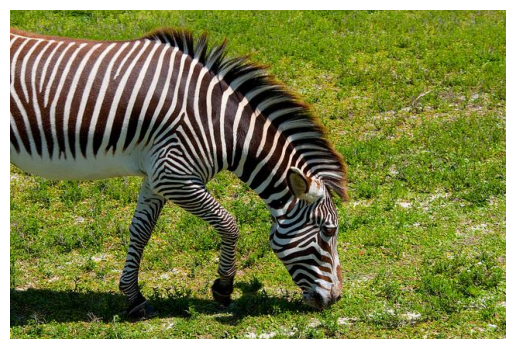

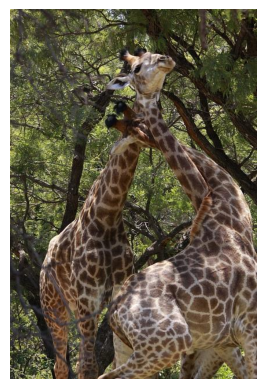

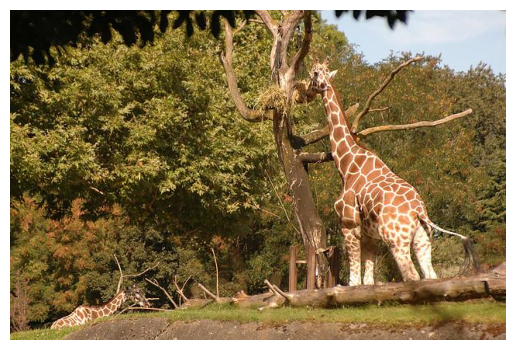

In [7]:
# Querying for "Animals"

retrieved = collection.query(query_texts=["animals"], include=['data'], n_results=3)
for img in retrieved['data'][0]:
    plt.imshow(img)
    plt.axis("off")
    plt.show()

### 🔍 Query Collection for "Vehicles"  
This code queries the ChromaDB collection for images related to the text "vehicles" and displays the top 3 results.


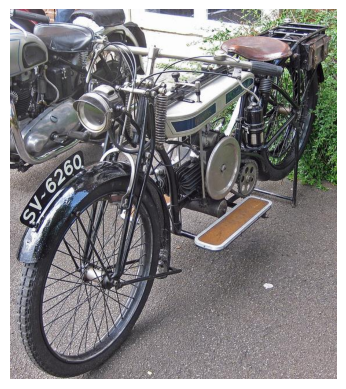

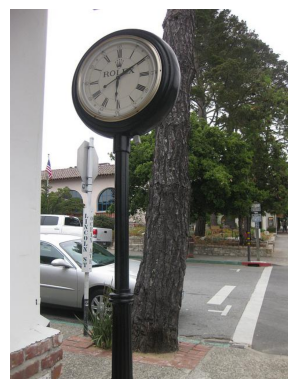

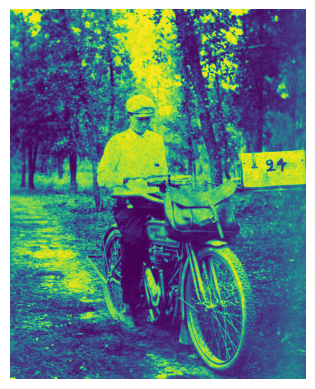

In [8]:
retrieved = collection.query(query_texts=["vehicles"], include=['data'], n_results=3)
for img in retrieved['data'][0]:
    plt.imshow(img)
    plt.axis("off")
    plt.show()

### 🔍 Query Collection for "Street Scenes"  
This code queries the ChromaDB collection for images related to the text "street scene" and displays the top 3 results.


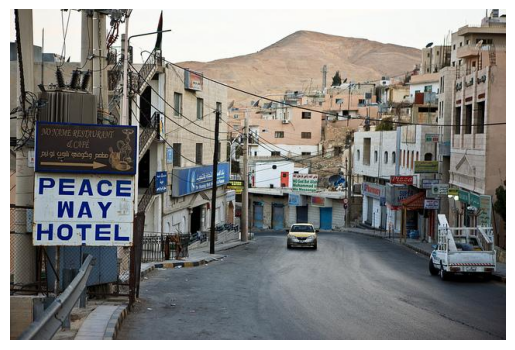

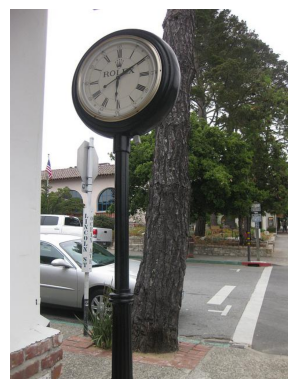

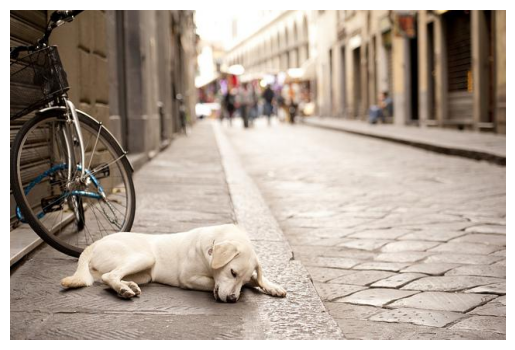

In [9]:
# Querying for "Street Scenes"

retrieved = collection.query(query_texts=["street scene"], include=['data'], n_results=3)
for img in retrieved['data'][0]:
    plt.imshow(img)
    plt.axis("off")
    plt.show()

### 🖼️ Query Collection with Image  
This code queries the ChromaDB collection using an example image and displays the top 5 similar images based on visual similarity.


Query Image


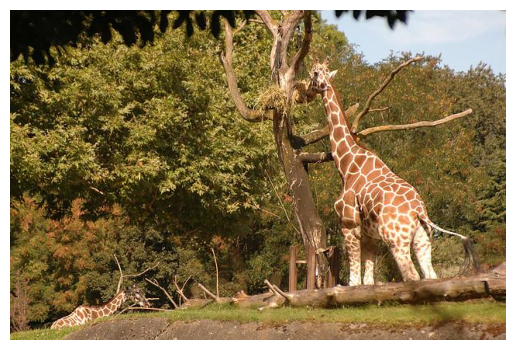

Results


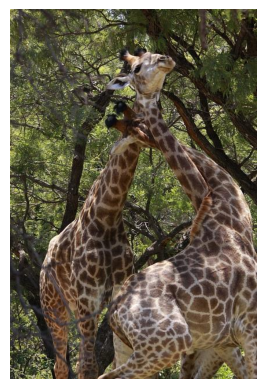

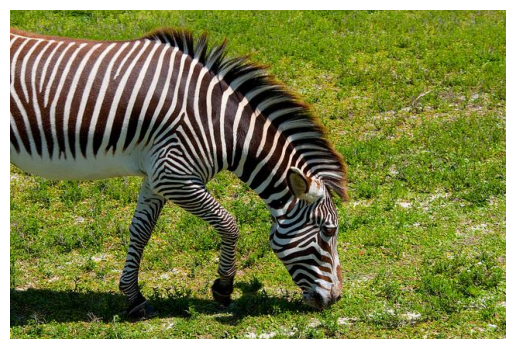

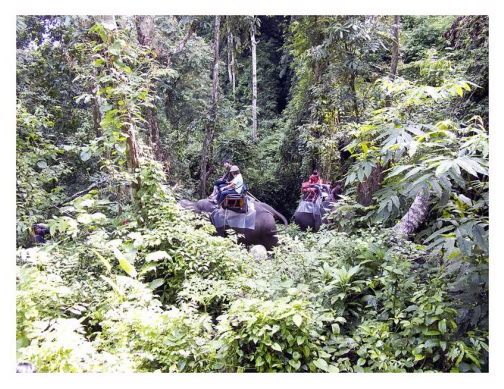

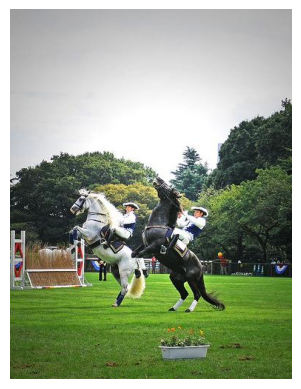

In [10]:
from PIL import Image
import numpy as np

query_image = np.array(Image.open(f"{IMAGE_FOLDER}/1.jpg"))
print("Query Image")
plt.imshow(query_image)
plt.axis('off')
plt.show()

print("Results")
retrieved = collection.query(query_images=[query_image], include=['data'], n_results=5)
for img in retrieved['data'][0][1:]:
    plt.imshow(img)
    plt.axis("off")
    plt.show()

### 🌐 Query Collection with URI  
This code queries the ChromaDB collection using the URI of an image and displays the top 5 similar images based on the provided URI.


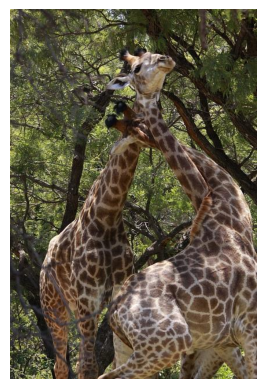

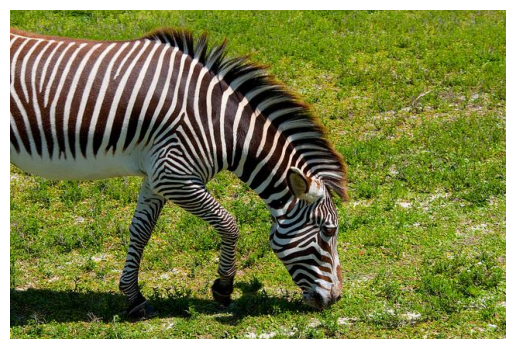

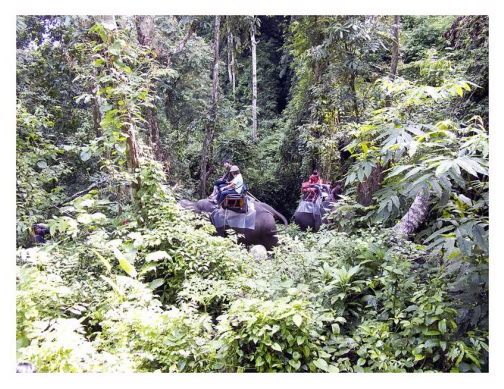

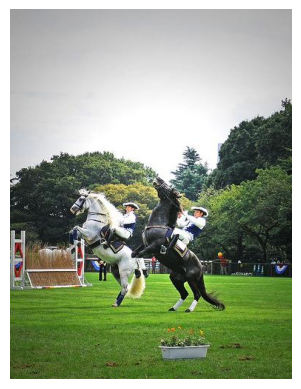

In [11]:
query_uri = image_uris[1]

query_result = collection.query(query_uris=query_uri, include=['data'], n_results=5)
for img in query_result['data'][0][1:]:
    plt.imshow(img)
    plt.axis("off")
    plt.show()